In [32]:
import cv2
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [9]:
segcap_09_11_19_01_25_53_cap_df.columns

Index(['Unnamed: 0', 'cap_no', 'count', 'epoch_no', 'kurtosis', 'layer_name',
       'mean', 'median', 'minmax', 'nobs', 'skewness', 'variance'],
      dtype='object')

In [43]:
def gen_dir(src_path,tmp_path):
    trl_path=os.path.join(src_path,tmp_path)
    
    if not os.path.isdir(trl_path):
        os.mkdir(trl_path)
    
    return trl_path

'C:\\Users\\niall\\Downloads\\per_caps_plot\\bconv_cap_3_144'

In [ ]:
src_dir=r'C:\Users\niall\Downloads\Per capsule performance'
df_csv='SegCaps_multilabels_2019-11-28_11-24-37_summary_df.csv'
dst_dir=r'C:\Users\niall\Downloads\per_caps_plot'


segcap_df=pd.read_csv(os.path.join(src_dir,df_csv))

capsule_layers=segcap_df.layer_name.unique()
stat_lst=['median','mean','kurtosis','variance']

for cap_lyr in capsule_layers:
    #
    filt_df=segcap_df[segcap_df.layer_name.isin([cap_lyr])]
    
    dst_dir_cap=gen_dir(dst_dir,cap_lyr)
    
    for stat_dim in stat_lst:
        fig,axs=plt.subplots(figsize=(15,15))
        sns.lineplot(ax=axs,data=filt_df[filt_df.epoch_no>750],x='epoch_no',y=stat_dim,hue='cap_no')
        g=plt.gcf()
        dst_pth=os.path.join(dst_dir_cap,os.path.splitext(df_csv)[0]+'last100epochs_capsule_layer_'+cap_lyr+'_'+stat_dim+'.jpeg')
        g.savefig(dst_pth)

In [78]:
max_segcaps_vals_mean=pd.DataFrame(segcap_df.groupby(['layer_name'])['epoch_no'].max())
max_segcaps_vals_median=segcap_df.groupby(['layer_name'])['median'].max()
#max_segcaps_vals_mean.layer_name.str.contains('_adadelta_1')
max_segcaps_vals_mean_ad1=max_segcaps_vals_mean.loc[max_segcaps_vals_mean.index.str.endswith('adadelta_1'),:]
max_segcaps_vals_mean_ad=max_segcaps_vals_mean.loc[max_segcaps_vals_mean.index.str.endswith('adadelta'),:]
max_segcaps_vals_mean_gnrl=max_segcaps_vals_mean.loc[~max_segcaps_vals_mean.index.str.contains('adadelta'),:]

In [126]:
max_segcaps_vals_mean_epoch=segcap_df.loc[(~segcap_df.layer_name.str.contains('adadelta'))&(segcap_df.epoch_no>=879),:]
max_segcaps_vals_mean_epoch_grp=max_segcaps_vals_mean_epoch.groupby(['layer_name','cap_no'])[['median']].max()
max_segcaps_vals_mean_epoch_grp.reset_index(inplace=True)
#max_segcaps_vals_mean_epoch_grp.pivot(index='layer_name', columns='cap_no', values='median')
max_segcaps_vals_mean_epoch_grp['unfilt_cap_no']=max_segcaps_vals_mean_epoch_grp.cap_no.str.extract('(\d+)').astype(float)
#max_segcaps_vals_mean_epoch_grp_cp_no_unfilt
max_segcaps_vals_mean_epoch_grp=max_segcaps_vals_mean_epoch_grp[~max_segcaps_vals_mean_epoch_grp.layer_name.isin(['bseg_caps','Wseg_caps'])]

In [139]:
trl_lst=[]
for vals in max_segcaps_vals_mean_epoch_grp.layer_name.unique():
    tmp_df=max_segcaps_vals_mean_epoch_grp[max_segcaps_vals_mean_epoch_grp.layer_name==vals]
    tmp_df_min=tmp_df.loc[tmp_df.unfilt_cap_no>0,'unfilt_cap_no'].min()
    tmp_df_vals=tmp_df.unfilt_cap_no/tmp_df_min
    trl_lst=trl_lst+tmp_df_vals.values.tolist()
trl_lst=['cap_no_'+str(x) for x in trl_lst]
max_segcaps_vals_mean_epoch_grp['actual_cap_no']=trl_lst
max_segcaps_vals_mean_epoch_grp_wghts=max_segcaps_vals_mean_epoch_grp[max_segcaps_vals_mean_epoch_grp.layer_name.str.contains(*['Wconv','Wdeconv'])]
max_segcaps_vals_mean_epoch_grp_bias=max_segcaps_vals_mean_epoch_grp[max_segcaps_vals_mean_epoch_grp.layer_name.str.contains(*['bconv','bdeconv'])]


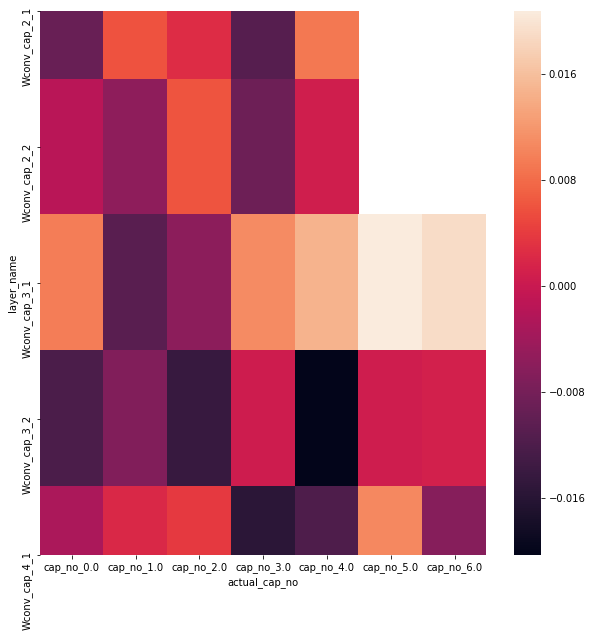

In [138]:
pivot_heatmap=max_segcaps_vals_mean_epoch_grp_wghts.pivot(index='layer_name',columns='actual_cap_no',values='median')
fig,axs=plt.subplots(figsize=(10,10))
sns.heatmap(ax=axs,data=pivot_heatmap)

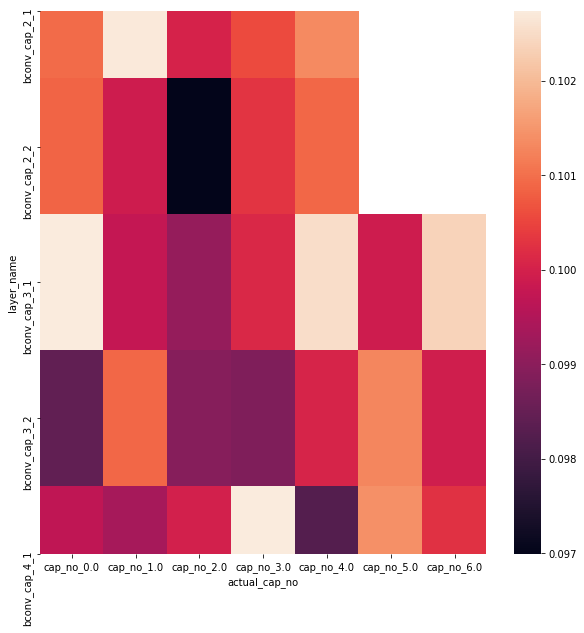

In [140]:
pivot_heatmap=max_segcaps_vals_mean_epoch_grp_bias.pivot(index='layer_name',columns='actual_cap_no',values='median')
fig,axs=plt.subplots(figsize=(10,10))
sns.heatmap(ax=axs,data=pivot_heatmap)